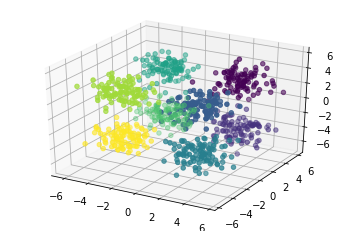

In [11]:
from __future__ import print_function, division
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
%matplotlib inline


# define the centers of each Gaussian cloud
centers = np.array([
[ 1,  1,  1],
[ 1,  1, -1],
[ 1, -1,  1],
[ 1, -1, -1],
[-1,  1,  1],
[-1,  1, -1],
[-1, -1,  1],
[-1, -1, -1],
])*3

# create the clouds, Gaussian samples centered at
# each of the centers we just made
data = []
d = []
pts_per_cloud = 100
for c in centers:
    cloud = np.random.randn(pts_per_cloud, 3) + c
    d.append(cloud)
    data = np.concatenate(d)

# visualize the clouds in 3-D
# add colors / labels so we can track where the points go
colors = np.array([[i]*pts_per_cloud for i in range(len(centers))]).flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=colors)
plt.show()

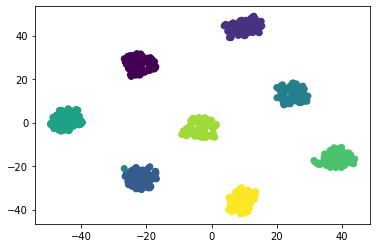

In [2]:
# perform dimensionality reduction
tsne = TSNE()
transformed = tsne.fit_transform(data)

# visualize the clouds in 2-D
plt.scatter(transformed[:,0], transformed[:,1], c=colors)
plt.show()

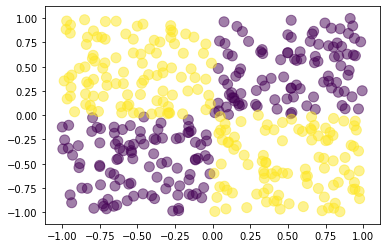

In [16]:
def get_xor_data():
    X1 = np.random.random((100, 2))
    X2 = np.random.random((100, 2)) - np.array([1, 1])
    X3 = np.random.random((100, 2)) - np.array([1, 0])
    X4 = np.random.random((100, 2)) - np.array([0, 1])
    X = np.vstack((X1, X2, X3, X4))
    Y = np.array([0]*200 + [1]*200)
    return X, Y



X, Y = get_xor_data()

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

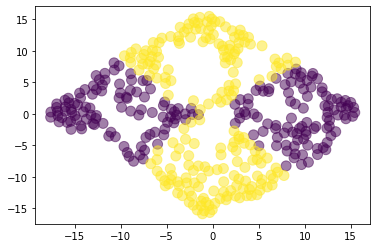

In [17]:
tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

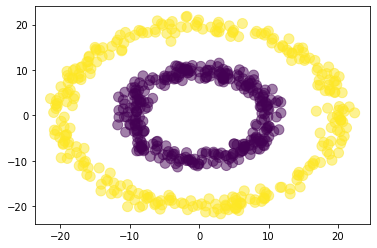

In [18]:
def get_donut_data():
    N = 600
    R_inner = 10
    R_outer = 20

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y


X, Y = get_donut_data()

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

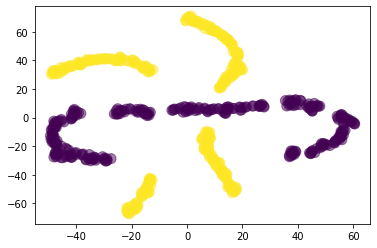

In [21]:
tsne = TSNE(perplexity=10)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

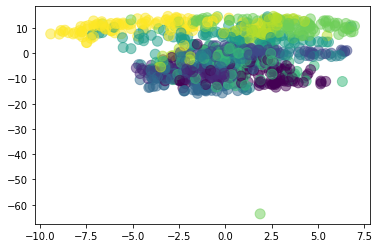

In [22]:
from util import getKaggleMNIST
from util import getFashionMNIST

Xtrain, Ytrain, _, _ = getFashionMNIST()

sample_size = 1000
X = Xtrain[:sample_size]
Y = Ytrain[:sample_size]

tsne = TSNE(n_components=3)
Z = tsne.fit_transform(X)

plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

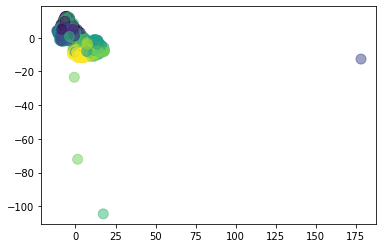

In [8]:
plt.scatter(Z[:,1], Z[:,2], s=100, c=Y, alpha=0.5)
plt.show()

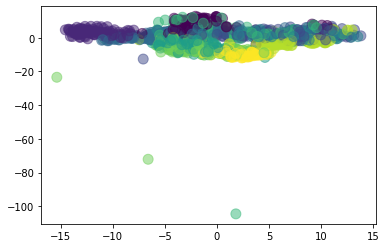

In [9]:
plt.scatter(Z[:,0], Z[:,2], s=100, c=Y, alpha=0.5)
plt.show()

In [10]:
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:,0],  Z[:,1], Z[:,2], c=Y)
plt.show()